# Proyecto Final Algebra Lineal 2017
---

El proyecto del curso consiste en la implementación del [Algortimo de Canny](https://es.wikipedia.org/wiki/Algoritmo_de_Canny) para la detección de bordes en imágenes y videos. Para ello, se le entrega al estudiante toda la implementación del algoritmo en [OpenCV](http://opencv.org/) y su objetivo es **implementar las funciones de OpenCV con matrices**. 

Las funciones a modificar serán las siguientes:
```python
cv2.GaussianBlur()
cv2.Sobel()
```

No es necesario que modifique más del código que se le solicita, pero puede hacer las modificaciones pertinentes si ese fuera el caso. Dentro del código se le indica en qué parte debe de ser modificado, por ejemplo:

```python
'''Modificar esta función'''
    sobel = cv2.Sobel(img, cv2.CV_64F, x, y, ksize=sobel_kernel)
``` 

Se recomienda buscar maneras de optimizar los cálculos de sus filtros, pues más adelante existe una aplicación en tiempo real donde es crucial que sus cálculos sean lo más rápidos posibles. Las dimensiones de los *kernels* no pueden ser modificadas.

## 0. Conceptos
Para poder modificar las funciones solicitadas es necesario que comprenda algunos conceptos, por lo cual es necesario que defina:

1. ¿En que consiste la convolución y cómo puede ser calculada? (Puede dar una definición matemática y/o ejemplos).
es un operador matemático que transforma dos funciones f y g en una tercera función que en cierto sentido representa la magnitud en la que se superponen f y una versión trasladada e invertida de g.

2. ¿Qué es el *kernel* de un filtro y para que se utiliza?
Es ñamatriz de coeficientes es conocida como marcara, que nos permite modificar un pixel seleccionando una proporción de la imagen del mismo tamaño que el kernel para poder realizar una multiplicación de elemento por elemento.

3. ¿En qué consiste un filtro Gaussiano?
El filtro gaussiano consiste en desenfocar una imagen. El método de desenfoque gaussiano IIR actúa sobre cada píxel de la capa activa o selección, estableciendo su valor como el promedio de todos los valores de los píxeles incluidos en un radio definido en el diálogo. Un valor alto producirá una mayor efecto de desenfoque. Se puede hacer que el desenfoque actúe más hacia alguna dirección pulsando con el ratón el botón de la cadena de tal forma que ésta quede rota, y alterando el radio

4. ¿En qué consiste el Filtro Sobel? ¿para qué sirve?
El filtro Sobel Técnicamente es un operador diferencial discreto que calcula una aproximación al gradiente de la función de intensidad de una imagen. Detecta los bordes horizontales y verticales separadamente sobre una imagen en escala de grises. Las imágenes en color se convierten en RGB en niveles de grises.

3. Describa el algoritmo de detección de bordes Canny.
Describa el algoritmo de detección de bordes Canny. El propósito de Canny era descubrir el algoritmo óptimo de detección de bordes. Para que un detector de bordes pueda ser considerado óptimo debe cumplir los siguientes puntos:

Buena detección- el algoritmo debe marcar el mayor número real en los bordes de la imagen como sea posible.
Buena localización- los bordes de marca deben estar lo más cerca posible del borde de la imagen real.
Respuesta mínima - El borde de una imagen sólo debe ser marcado una vez, y siempre que sea posible, el ruido de la imagen no debe crear falsos bordes. 

In [1]:
import numpy as np
import matplotlib.pylab as plt
import cv2

from moviepy.editor import VideoFileClip
from IPython.display import HTML
from PIL import Image
import math

%matplotlib inline

In [40]:
def Mygauss_blur(img):
    
    kernel = np.array([[1,2,3,2,1],
                       [2,7,11,7,2],
                       [3,11,17,11,3],
                        [2,7,11,7,2],
                        [1,2,3,2,1]],dtype=np.float)
    r= img.shape[0]
    c= img.shape[1]
    #gauss = np.zeros((r, c), dtype=np.uint8)
    su=kernel.sum()
    kernel = kernel/su
    
    for i in range(1, r - len(kernel)+1):
        for j in range(1, c - len(kernel)+1):
            
            img[i][j]=(kernel*img[i:i+len(kernel),j:j+len(kernel)]).sum()
                #signal_patch=img[i:i+len(kernel),j:j+len(kernel)]   
                #gauss[i][j]=(kernel*signal_patch).sum()

           
    return img
 


In [48]:
def Mysobel_fun(img, orient='x'):
    # Calculate directional gradient
    r,c=img.shape
    sobel=np.zeros((r,c), dtype=np.uint8)
    if orient == 'x':
        kernel=np.array([[-1,-2,-1],
                  [0, 0 ,0],
                  [1, 2 ,1]],dtype=np.float)
        
    elif orient == 'y':
        kernel=np.array([[-1,0,1],
                [-2,0,2],
                [-1,0,1]],dtype=np.float)
        
     
    for i in range(1, r - len(kernel)+1):
        for j in range(1, c - len(kernel)+1):
                sobel[i][j]=np.sqrt(((kernel*img[i:i+len(kernel),j:j+len(kernel)]).sum())**2)
   
    return sobel

In [49]:
def gaussian_blur(img, kernel = 5):
    '''Modificar esta función'''
                                         
    # return cv2.GaussianBlur(img,(kernel,kernel),0)gauss_blur(img, r):mygauss_fun(img,opc=0)
    img = Mygauss_blur(img)
    #img = gauss_blur(img, 5)
    return img

def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Calculate directional gradient
    if orient == 'x':
        x,y = 1,0
    elif orient == 'y':
        x,y = 0,1
        
    '''Modificar esta función'''
    #sobel = cv2.Sobel(img, cv2.CV_64F, x, y, ksize=sobel_kernel)
    sobel=Mysobel_fun(img, orient)
    
    # Take the absolute value of the derivative or gradient
    #abs_sobel = np.absolute(sobel)

    # Scale to 8-bit (0 - 255) then convert to type = np.uint8
    #scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    # Create a mask of 1's where the scaled gradient magnitude 
    # is > thresh_min and < thresh_max
    #sbinary = np.zeros_like(scaled_sobel)
    #sbinary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    sbinary = np.zeros_like(sobel)
    sbinary[(sobel >= thresh[0]) & (sobel <= thresh[1])] = 1
    return sbinary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    # Take the gradient in x and y separately
    '''Modificar esta función'''
    #sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobelx = Mysobel_fun(image, orient='x')
    '''Modificar esta función'''
    #sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    sobely =Mysobel_fun(image, orient='y')
    # Calculate the magnitude 
    abs_sobel = np.sqrt(sobelx**2 +sobely**2)
    
    # Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    # Create a binary mask where mag thresholds are met
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    return sbinary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Take the gradient in x and y separately
    '''Modificar esta función'''
    #sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobelx = Mysobel_fun(image, orient='x')
    '''Modificar esta función'''
    #sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    sobely = Mysobel_fun(image, orient='y')

    # Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)   
    abs_sobely = np.absolute(sobely)
    
    # Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    grad_dir = np.arctan2(abs_sobely, abs_sobelx)
    
    # Create a binary mask where direction thresholds are met
    sbinary = np.zeros_like(grad_dir)
    sbinary[(grad_dir >= thresh[0]) & (grad_dir <= thresh[1])] = 1
    return sbinary

## 1. Prueba en Imagen


In [50]:
# Test filter on single image
im = plt.imread("BTD.jpg")
#im = Image.open('BTD.jpg').convert('L')

#im = plt.imread("BTD.jpg")
#%time gray = gaussian_blur(im, kernel = 5)
gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
#%time gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

# Gaussian Blur Filtering
%time gray = gaussian_blur(gray, kernel = 5)

# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
%time gradx = abs_sobel_thresh(gray, orient='x', sobel_kernel=ksize, thresh=(50, 100))
%time grady = abs_sobel_thresh(gray, orient='y', sobel_kernel=ksize, thresh=(50, 100))
%time mag_binary = mag_thresh(gray, sobel_kernel=ksize, mag_thresh=(20, 100))
%time dir_binary = dir_threshold(gray, sobel_kernel=ksize, thresh=(0, np.pi/2))

# Create combined image with sobel filters applied
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

rgb_combined = np.asarray(np.dstack((combined, combined, combined)), dtype=np.float64)

Wall time: 1min 40s
Wall time: 2min 34s
Wall time: 2min 35s
Wall time: 5min 10s
Wall time: 5min 14s


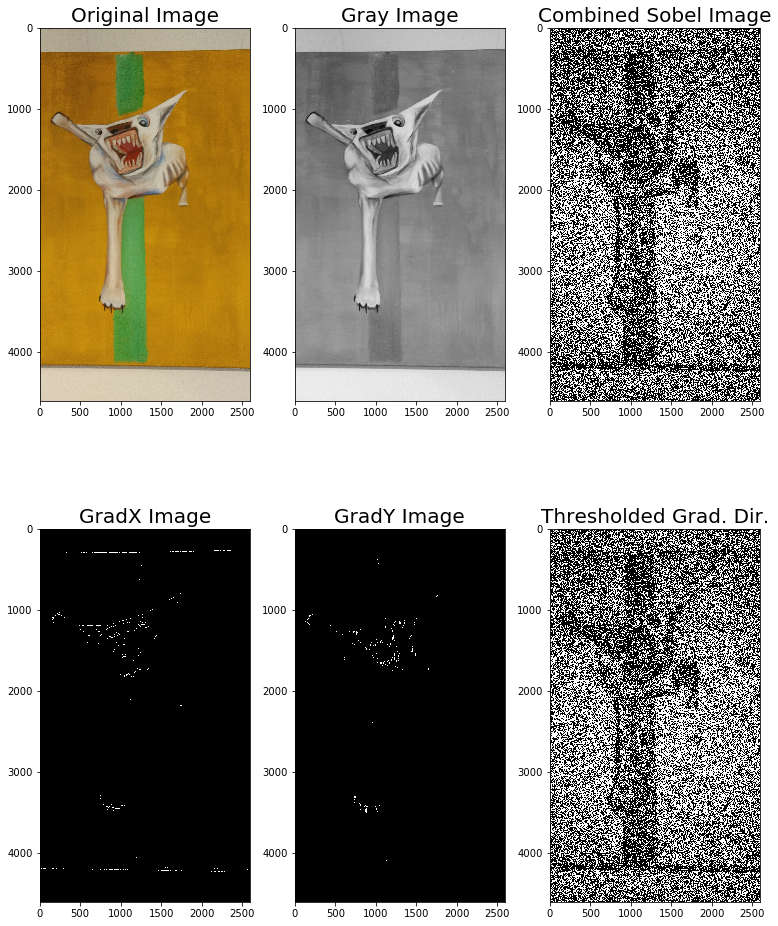

In [51]:
# Plot the result
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(10, 15))
f.tight_layout()
ax1.imshow(im)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(gray, cmap='gray')
ax2.set_title('Gray Image', fontsize=20)
ax3.imshow(rgb_combined, cmap='gray')
ax3.set_title('Combined Sobel Image', fontsize=20)
ax4.imshow(gradx, cmap='gray')
ax4.set_title('GradX Image', fontsize=20)
ax5.imshow(grady, cmap='gray')
ax5.set_title('GradY Image', fontsize=20)
ax6.imshow(((mag_binary == 1) & (dir_binary == 1)), cmap='gray')
ax6.set_title('Thresholded Grad. Dir.', fontsize=20)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show() 

## 2. Prueba en Videos

In [37]:
def process_image(image):
    
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray = gaussian_blur(gray, kernel = 5)
    # Choose a Sobel kernel size
    ksize = 3 # Choose a larger odd number to smooth gradient measurements

    # Apply each of the thresholding functions
    gradx = abs_sobel_thresh(gray, orient='x', sobel_kernel=ksize, thresh=(50, 100))
    grady = abs_sobel_thresh(gray, orient='y', sobel_kernel=ksize, thresh=(50, 100))
    mag_binary = mag_thresh(gray, sobel_kernel=ksize, mag_thresh=(20, 100))
    dir_binary = dir_threshold(gray, sobel_kernel=ksize, thresh=(0, np.pi/4))
    
    combined = np.zeros_like(dir_binary)
    combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
    
    
    rgb_combined = np.asarray(np.dstack((combined, combined, combined)), dtype=np.uint8)
    
    retval, threshold = cv2.threshold(rgb_combined, 0, 255, cv2.THRESH_BINARY)
    
    return threshold

In [38]:
filter_output = 'Batman_Filter.mp4'
clip1 = VideoFileClip("Batman.mp4")
batman_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time batman_clip.write_videofile(filter_output, audio=False)

[MoviePy] >>>> Building video Batman_Filter.mp4
[MoviePy] Writing video Batman_Filter.mp4


[MoviePy] Done.
[MoviePy] >>>> Video ready: Batman_Filter.mp4 

Wall time: 2h 42min 4s


In [39]:
HTML("""
<video width="720" height="480" controls>
  <source src="{0}">
</video>
""".format(filter_output))

In [ ]:
cap = cv2.VideoCapture(0)  # 0 for Python 3, 1 for Python 2. No idea why?!!

out = cv2.VideoWriter("output.avi", cv2.VideoWriter_fourcc(*"MJPG"), 20,(640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,180)
        new_frame = process_image(frame)
        out.write(new_frame)

        cv2.imshow('frame',new_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
def gauss_blur(img, r):
    image = img

    # do-it-yourself convolution:
    # For each pixel in the input image, we'll inspect its neighborhood. A 3x3 kernel thus peeks
    # at every neighbor of a specific pixel (there are 8 pixel neighbors) whereas a 5x5 kernel
    # peeks at two pixels in every direction (i.e. 24 pixel neighbors).

    # A kernel of all ones is called a box blur and is simply averaging all neighbors (sum all, optionally divide by count).
    kernel = np.array([[1, 2, 1],
                    [2, 8, 2],
                    [1, 2, 1]],dtype=np.float)

    # the weighed pixels have to be in range 0..1, so we divide by the sum of all kernel
    # values afterwards
    kernel_sum = kernel.sum()

    # fetch the dimensions for iteration over the pixels and weights
    i_width, i_height = image.shape[0], image.shape[1]
    k_width, k_height = kernel.shape[0], kernel.shape[1]

    # prepare the output array
    filtered = np.zeros_like(image)

    # Iterate over each (x, y) pixel in the image ...
    for y in range(i_height):
        for x in range(i_width):
            weighted_pixel_sum = 0

            # Iterate over each weight at (kx, ky) in the kernel defined above ...
            # We interpret the kernel weights in a way that the 'central' weight is at (0, 0);
            # so the coordinates in the kernel are:
            #
            #  [ (-1,-1),  (0,-1),  (1,-1)
            #    (-1, 0),  (0, 0),  (1, 0)
            #    (-1, 1),  (0, 1),  (1, 1)
            #
            # This way, the pixel at image[y,x] is multiplied with the kernel[0,0]; analogous,
            # image[y-1,x] is multiplied with kernel[-1,0] etc.
            # The filtered pixel is then the sum of these, so that
            #
            #   weighted_pixel_sum = image[y-1,x-1] * kernel[-1,-1] +
            #                        image[y-1,x  ] * kernel[-1, 0] +
            #                        image[y-1,x+1] * kernel[-1, 1] +
            #                        image[y,  x-1] * kernel[ 0, 1] +
            #                        image[y,  x  ] * kernel[ 0, 0] +
            #                        etc.

            for ky in range(-(k_height / 2), k_height - 1):
                for kx in range(-(k_width / 2), k_width - 1):
                    pixel = 0
                    pixel_y = y - ky
                    pixel_x = x - kx

                    # boundary check: all values outside the image are treated as zero.
                    # This is a definition and implementation dependent, it's not a property of the convolution itself.
                    if (pixel_y >= 0) and (pixel_y < i_height) and (pixel_x >= 0) and (pixel_x < i_width):
                        pixel = image[pixel_y, pixel_x]

                    # get the weight at the current kernel position
                    # (also un-shift the kernel coordinates into the valid range for the array.)
                        weight = kernel[ky + (k_height / 2), kx + (k_width / 2)]

                    # weigh the pixel value and sum
                    weighted_pixel_sum += pixel * weight

            # finally, the pixel at location (x,y) is the sum of the weighed neighborhood
            filtered[y, x] = weighted_pixel_sum / kernel_sum
    return filtered

In [ ]:
def mygauss_fun(img,opc=0):
    if orient == 0:
        r, c = img.shape
        gauss = np.zeros((r, c), dtype=np.uint8)

        kernel= np.array([[1, 2, 1],
                         [2, 8, 2],
                         [1, 2, 1]],dtype=np.float)

        for x in range(r-1):
            for y in range(c-1):
                suma = 0
                for i in range(len(kernel)):
                    for j in range (len(kernel)):
                        try:
                            if x < r-1 or y <c-1:
                                suma += int(img[(x-1)+i,(y-1)+j] * kernel[j][i])
                        except IndexError:
                            suma += 0

                gauss[x,y] = suma
    elif orient == 1:       
        r, c = img.shape
        gauss = np.zeros((r, c), dtype=np.uint8)
        kgss = np.array([[1, 2, 1],
                         [2, 8, 2],
                         [1, 2, 1]],dtype=np.float)
        kgss = kgss / 20
        for i in range(1, r - 1):
            for j in range(1, c - 1):
                gauss[i, j] = (img[i - 1, j - 1] * kgss[0, 0] + img[i, j - 1] * kgss[0, 1] + img[i + 1, j - 1] * kgss[0, 2] \
                             + img[i - 1, j] * kgss[1, 0] + img[i, j] * kgss[1, 1] + img[i + 1, j] * kgss[1, 2] \
                             + img[i - 1, j + 1] * kgss[2, 0] + img[i, j + 1] * kgss[2, 1] + img[i + 1, j + 1] * kgss[2, 2])
           
    return gauss
def Mysobel_fun(img, orient='x'):
    # Calculate directional gradient
    r,c=img.shape
    sobel=np.zeros((r,c), dtype=np.uint8)
    if orient == 'x':
        kernel=np.array([[-1,-2,-1],
                  [0, 0 ,0],
                  [1, 2 ,1]],dtype=np.float)
        kernel = kernel/4
        for i in range(1,r -1):
            for j in range(1,c -1):
                sobel[i, j] = np.sqrt((
                                        (img[i - 1, j - 1] * kernel[0, 0] + img[i, j - 1] * kernel[0, 1] + img[i + 1, j - 1] * kernel[0, 2]\
                                        + img[i - 1, j + 1] * kernel[2, 0] + img[i, j + 1] * kernel[2, 1] + img[i + 1, j + 1] * kernel[2, 2])
                )**2)
    
    elif orient == 'y':
        kernel=np.array([[-1,0,1],
                [-2,0,2],
                [-1,0,1]],dtype=np.float)
        kernel = kernel/4
        for i in range(1, r - 1):
            for j in range(1, c - 1):
                sobel[i, j] =np.sqrt((
                                           (img[i - 1, j - 1] * kernel[0, 0] + img[i + 1, j - 1] * kernel[0, 2]\
                                           + img[i - 1, j] * kernel[1, 0] + img[i + 1, j] * kernel[1, 2]\
                                           + img[i - 1, j + 1] * kernel[2, 0] + img[i + 1, j + 1] * kernel[2, 2])
                )**2)        
    return sobel


In [ ]:
    def gauss_blur(img, r):
        imgData = list(img.getdata())

        bluredImg = Image.new(img.mode, img.size)
        bluredImgData = list(bluredImg.getdata())

        rs = int(math.ceil(r * 2.57))

        for i in range(0, img.height):
            for j in range(0, img.width):
                val = 0
                wsum = 0
                for iy in range(i - rs, i + rs + 1):
                    for ix in range(j - rs, j + rs + 1):
                        x = min(img.width - 1, max(0, ix))
                        y = min(img.height - 1, max(0, iy))
                        dsq = (ix - j) * (ix - j) + (iy - i) * (iy - i)
                        weight = math.exp(-dsq / (2 * r * r)) / (math.pi * 2 * r * r)
                        val += imgData[y * img.width + x] * weight
                        wsum += weight 
                bluredImgData[i * img.width + j] = round(val / wsum)

        bluredImg.putdata(bluredImgData)
    return bluredImg

In [ ]:
def convolve(A, k):
    r,c = A.shape
    m,n = k.shape
    h = np.rot90(k, 2)
    centerR = (m+1)/2
    centerC = (m+1)/2
    left = centerC - 1
    right = n - centerC
    top = centerR - 1
    bottom = m - centerR
    Rep = np.zeros((r + top + bottom, c + left + right),dtype=np.uint8)
    for x in range(1+top, r +top):
        for y in range(1+left, c + left):
            Rep[x,y] = A[x - top, y - left]
    B = np.zeros((r , c),dtype=np.uint8)
    print r,c,m,n,B.shape[0],B.shape[1],Rep.shape[0],Rep.shape[1]
    for x in range(0,r):
        for y in range(0,c):
            for i in range(0,m):
                for j in range(0,n):                    
                     B[x, y] = B[x, y] + (Rep[i + x, j + y] * h[i, j])
                    
    return B

In [ ]:
from PIL import Image
import math

# img = Image.open('input.jpg').convert('L')
# r = radiuss
def gauss_blur(img, r):
    imgData = img

    bluredImg = Image.new(img.mode, img.size)
    bluredImgData = list(bluredImg.getdata())

    rs = int(math.ceil(r * 2.57))

    for i in range(0, img.height):
        for j in range(0, img.width):
            val = 0
            wsum = 0
            for iy in range(i - rs, i + rs + 1):
                for ix in range(j - rs, j + rs + 1):
                    x = min(img.width - 1, max(0, ix))
                    y = min(img.height - 1, max(0, iy))
                    dsq = (ix - j) * (ix - j) + (iy - i) * (iy - i)
                    weight = math.exp(-dsq / (2 * r * r)) / (math.pi * 2 * r * r)
                    val += imgData[y * img.width + x] * weight
                    wsum += weight 
            bluredImgData[i * img.width + j] = round(val / wsum)

    bluredImg.putdata(bluredImgData)
    return bluredImg